In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def compute_map(contributions, var_x, var_y, nclass):
    Output = np.zeros((nclass,nclass,3))
    dx = (var_x.max()-var_x.min())/nclass
    dy = (var_y.max()-var_y.min())/nclass

    for iclass1 in range (nclass):
        for iclass2 in range (nclass):
            Output[iclass1,iclass2,:] = np.mean(contributions[np.where((var_x < var_x.min()+dx*(iclass2+1)) & (var_x > var_x.min()+dx*iclass2) & (var_y < var_y.min()+dy*(iclass1+1)) & (var_y > var_y.min()+dy*iclass1))], axis = 0)

    return Output

hola
hola
hola


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


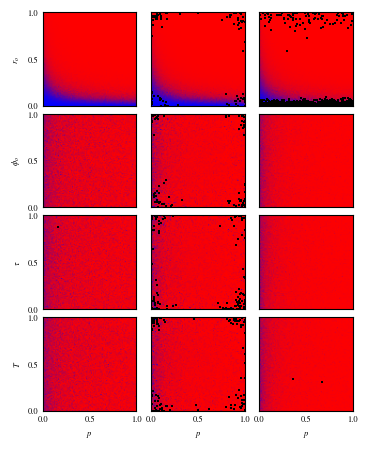

In [57]:
files = 10
cases = ['case_a', 'case_b', 'case_c']       #uniform, lognormal, normal
nclass = 50
points_per_file = 10000

plt.style.use('stylesheet.mpltstyle_rgb')
fig, axes = plt.subplots(nrows=4, ncols=3, figsize = (3.5,4.3), sharex=True, sharey=True)

for ncase, case in enumerate(cases):
    data = np.zeros((points_per_file*files, 29))
    for j in range(files):
        data_file = np.load('../Results/model_eval/'+case+'/wu_eval_'+str(j)+".npy")
        data[j*points_per_file:(j+1)*points_per_file,:] = data_file[:points_per_file]

    contributions = np.zeros((points_per_file*files,3))
    contributions[:,0] = data[:,15]*0.1*86400*365/1000/data[:,18]
    contributions[:,1] = data[:,16]*0.1*86400*365/1000/data[:,18]
    contributions[:,2] = data[:,17]*0.1*86400*365/1000/data[:,18]  
    print('hola')

    # p vs r_o
    var_x = data[:,0]
    var_y = data[:,1]
    axes[0,ncase].imshow(compute_map(contributions, var_x, var_y, nclass), origin = 'lower', extent = [0,1,0,1])
    axes[0,ncase].yaxis.set_ticks(np.arange(0, 1.0001, 0.5))
    if ncase == 0:
        axes[0,ncase].set_ylabel(r'$r_o$')
    print('hola')

    # p vs phi_o
    var_x = data[:,0]
    var_y = data[:,2]
    axes[1,ncase].imshow(compute_map(contributions, var_x, var_y, nclass), origin = 'lower', extent = [0,1,0,1])
    if ncase == 0:
        axes[1,ncase].set_ylabel(r'$\phi_o$')
    print('hola')

    # p vs tau
    var_x = data[:,0]
    var_y = data[:,3]
    axes[2,ncase].imshow(compute_map(contributions, var_x, var_y, nclass), origin = 'lower', extent = [0,1,0,1])
    if ncase == 0:
        axes[2,ncase].set_ylabel(r'$\tau$')
    print('hola')

    # p vs T
    var_x = data[:,0]
    var_y = data[:,14]
    axes[3,ncase].imshow(compute_map(contributions, var_x, var_y, nclass), origin = 'lower', extent = [0,1,0,1])
    axes[3,ncase].set_xlabel(r'$p$')
    if ncase == 0:
        axes[3,ncase].set_ylabel(r'$T$')
    print('hola')

fig.savefig('../Figures/rgb.pdf')